### Sobel Kernel Filter

In [1]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray' # change from viridis cmap into gray if the image is grayscale

In [2]:
# !pip install opencv-python if you don't have cv2

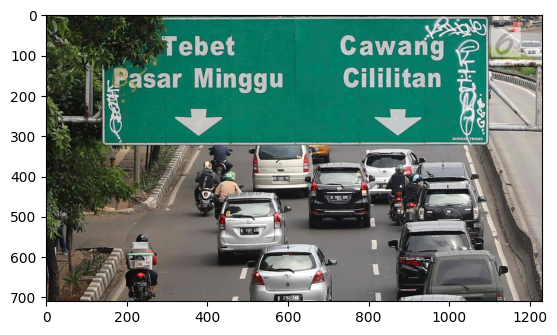

In [3]:
img = cv2.imread("images/street.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #cv2 will return matrix in BGR format meanwhile plt work in RGB format
# you could also write like this, img = img[:, :, ::-1]
plt.imshow(img);

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)      

In [6]:
img_gray.shape

(710, 1231)

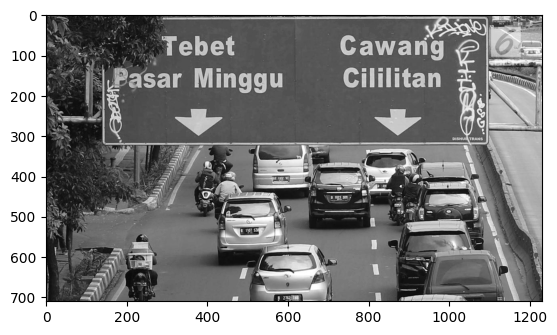

In [8]:
df = pd.DataFrame(img_gray)
df.to_csv("street.txt", header=False)
plt.imshow(img_gray);

* Don't forget to add 710,1231 (img_gray.shape) at rows 0 in street.txt
* Do convolution in convolution.c

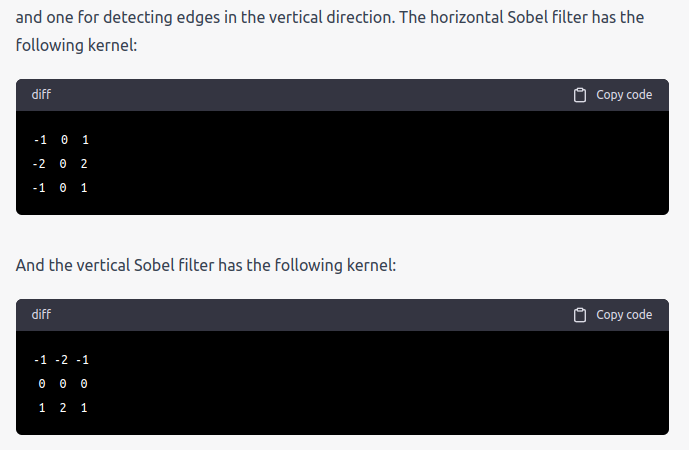

- Do convolution twice, eg. resulting sobel_x.txt for convolution street.txt with horizontal filter
- Resulting sobel_y.txt for convolution street.txt with vertical filter

In [9]:
df1 = pd.read_csv("street_sobel_x.txt")
sobel_x = df1.to_numpy()[:, :-1] # because last column is all nan, if yours not, you won't do that.
sobel_x

array([[-2.190e+02, -2.280e+02, -1.130e+02, ..., -1.280e+02,  3.710e+02,
         6.740e+02],
       [-2.490e+02, -1.880e+02,  1.600e+01, ...,  5.000e+01,  4.370e+02,
         5.820e+02],
       [-2.870e+02, -1.870e+02,  1.030e+02, ...,  1.380e+02,  3.260e+02,
         4.380e+02],
       ...,
       [-3.690e+02,  2.444e+03, -8.000e+00, ...,  5.200e+01,  6.900e+01,
         1.710e+02],
       [-3.650e+02,  2.455e+03, -3.000e+00, ...,  6.300e+01,  8.400e+01,
         1.810e+02],
       [-2.730e+02,  1.846e+03,  1.000e+00, ...,  5.200e+01,  6.900e+01,
         1.430e+02]])

In [10]:
sobel_x.shape

(709, 1231)

In [11]:
# Because image fixel (0-255) is positive then sobel_x = abs(sobel_x)
sobel_x = abs(sobel_x)
sobel_x

array([[2.190e+02, 2.280e+02, 1.130e+02, ..., 1.280e+02, 3.710e+02,
        6.740e+02],
       [2.490e+02, 1.880e+02, 1.600e+01, ..., 5.000e+01, 4.370e+02,
        5.820e+02],
       [2.870e+02, 1.870e+02, 1.030e+02, ..., 1.380e+02, 3.260e+02,
        4.380e+02],
       ...,
       [3.690e+02, 2.444e+03, 8.000e+00, ..., 5.200e+01, 6.900e+01,
        1.710e+02],
       [3.650e+02, 2.455e+03, 3.000e+00, ..., 6.300e+01, 8.400e+01,
        1.810e+02],
       [2.730e+02, 1.846e+03, 1.000e+00, ..., 5.200e+01, 6.900e+01,
        1.430e+02]])

In [12]:
df2 = pd.read_csv("street_sobel_y.txt")
sobel_y = df2.to_numpy()[:, :-1]
sobel_y = np.abs(sobel_y)
sobel_y

array([[1.700e+01, 4.000e+00, 1.190e+02, ..., 1.160e+02, 3.700e+01,
        8.000e+01],
       [2.100e+01, 3.200e+01, 2.200e+01, ..., 1.200e+02, 2.110e+02,
        1.420e+02],
       [2.500e+01, 5.100e+01, 1.700e+01, ..., 3.780e+02, 2.640e+02,
        7.800e+01],
       ...,
       [1.000e+00, 8.000e+00, 1.600e+01, ..., 2.800e+01, 1.300e+01,
        1.000e+00],
       [3.000e+00, 3.000e+00, 1.100e+01, ..., 4.100e+01, 3.000e+01,
        1.700e+01],
       [1.507e+03, 9.840e+02, 3.710e+02, ..., 2.260e+02, 1.890e+02,
        1.230e+02]])

In [13]:
sobel_y.shape  

(709, 1231)

In [14]:
sobel_total = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_total 

array([[ 219.65882636,  228.03508502,  164.1036258 , ...,  172.74258305,
         372.84044845,  678.73116917],
       [ 249.88397308,  190.70395906,   27.20294102, ...,  130.        ,
         485.27311898,  599.07261663],
       [ 288.08679248,  193.82982227,  104.39348639, ...,  402.40278329,
         419.49016675,  444.89099789],
       ...,
       [ 369.00135501, 2444.01309325,   17.88854382, ...,   59.05929224,
          70.21395873,  171.00292395],
       [ 365.01232856, 2455.00183299,   11.40175425, ...,   75.16648189,
          89.19641248,  181.79658963],
       [1531.52799517, 2091.88240587,  371.00134771, ...,  231.90515303,
         201.20139165,  188.62131375]])

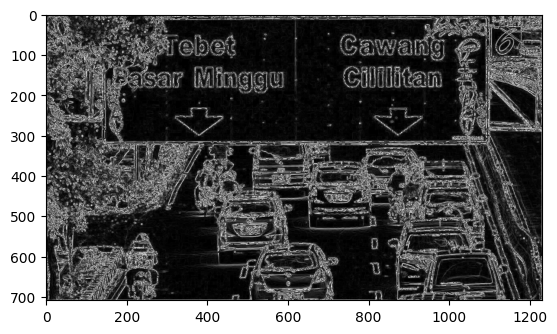

In [15]:
# karena banyak angka yang melebihi 255, maka kita wrap dengan menggunakan uint8
sobel_total = np.uint8(sobel_total)
plt.imshow(sobel_total);

In [16]:
cv2.imwrite("images/sobel_filtered_street.jpg", sobel_total)

True

Selesai

### More Saturated Kernel Filter

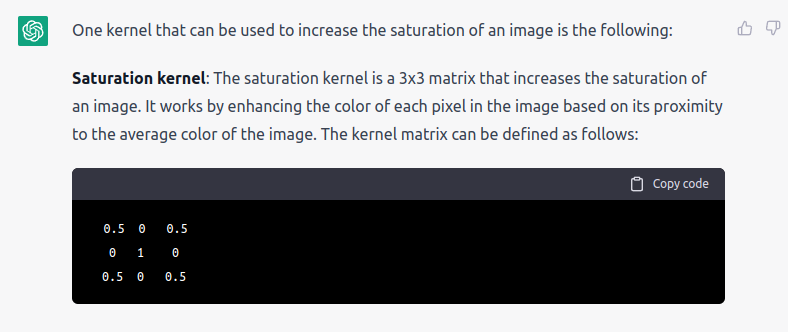

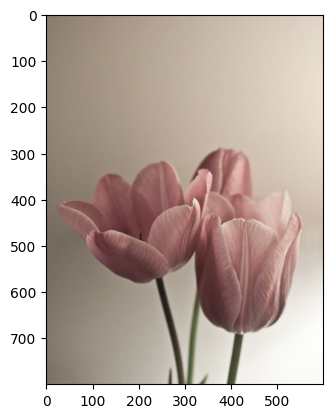

In [66]:
img = cv2.imread("images/flower_less_saturated.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [67]:
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
df_r = pd.DataFrame(R)
df_r.to_csv("flower_less_saturated_txt/flower_less_saturated_R.txt", header=False)
df_g = pd.DataFrame(G)
df_g.to_csv("flower_less_saturated_txt/flower_less_saturated_G.txt", header=False)
df_b = pd.DataFrame(B)
df_b.to_csv("flower_less_saturated_txt/flower_less_saturated_B.txt", header=False)

In [19]:
df_r.shape # add into 0th index in flower_less_saturated_X.txt, X = R, G, B

(800, 600)

In [89]:
df_rb = pd.read_csv("flower_less_saturated_txt/flower_saturated_R.txt")
df_rb = df_rb.to_numpy()[:, :-1]
df_rb = np.abs(df_rb)
df_rb = np.uint8(df_rb)
df_rb

array([[135,  12, 147, ..., 156, 156, 189],
       [135,  15, 147, ..., 156, 156, 189],
       [136,  20, 149, ..., 157, 156, 189],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [90]:
df_gb = pd.read_csv("flower_less_saturated_txt/flower_saturated_G.txt")
df_gb = df_gb.to_numpy()[:, :-1]
df_gb = np.abs(df_gb)
df_gb = np.uint8(df_gb)
df_gb

array([[122, 241, 107, ..., 120, 120, 165],
       [123, 246, 110, ..., 120, 120, 165],
       [124, 250, 111, ..., 121, 120, 165],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [91]:
df_bb = pd.read_csv("flower_less_saturated_txt/flower_saturated_B.txt")
df_bb = df_bb.to_numpy()[:, :-1]
df_bb = np.abs(df_bb)
df_bb = np.uint8(df_bb)
df_bb

array([[106, 209,  59, ...,  78,  78, 137],
       [107, 214,  62, ...,  78,  78, 137],
       [108, 218,  63, ...,  79,  78, 137],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [92]:
df_total = np.stack([df_rb, df_gb, df_bb], axis=2)

In [93]:
df_total = np.uint(df_total)

In [94]:
df_total.shape

(799, 600, 3)

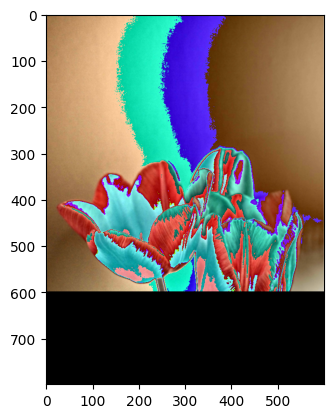

In [95]:
plt.imshow(df_total);

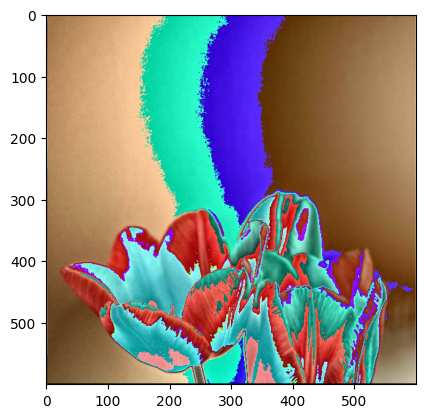

In [96]:
plt.imshow(df_total[:600, :]);

Not so good, it is more like cartoonize, but it just matter of kernel, find better kernel. But i like cartoon.

### More Brightness

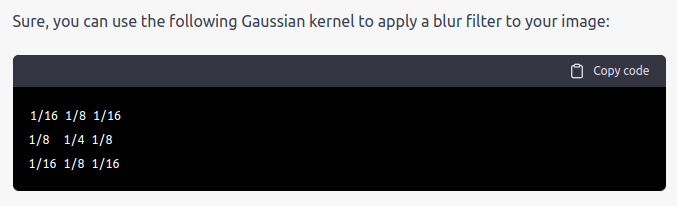

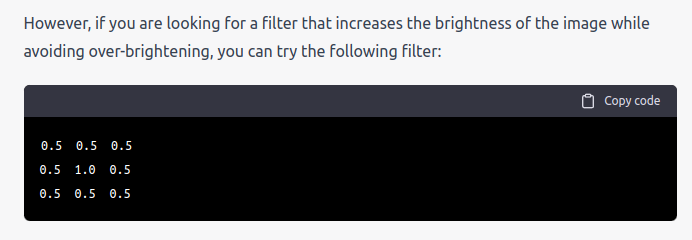

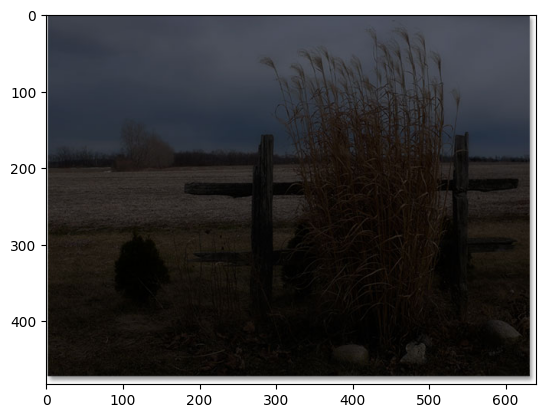

In [3]:
img = cv2.imread("images/image_less_brightness.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [4]:
img.shape

(483, 640, 3)

In [44]:
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
df_r = pd.DataFrame(R)
df_r.to_csv("image_less_brightness_txt/image_less_brightness_R.txt", header=False)
df_g = pd.DataFrame(G)
df_g.to_csv("image_less_brightness_txt/image_less_brightness_G.txt", header=False)
df_b = pd.DataFrame(B)
df_b.to_csv("image_less_brightness_txt/image_less_brightness_B.txt", header=False)

In [45]:
1/9

0.1111111111111111

In [46]:
1/16, 1/8, 1/4

(0.0625, 0.125, 0.25)

In [47]:
df_rb = pd.read_csv("image_less_brightness_txt/image_less_brightness_R_gaussian.txt")
df_rb = df_rb.to_numpy()[:, :-1]
df_rb = np.abs(df_rb)
df_rb = np.uint8(df_rb)
df_rb

array([[ 61, 185, 209, ..., 247, 247, 186],
       [ 61, 186, 209, ..., 246, 246, 186],
       [ 61, 186, 210, ..., 244, 246, 186],
       ...,
       [ 44,  49, 247, ..., 246, 247, 186],
       [ 45,  50, 247, ..., 247, 247, 186],
       [226, 230, 186, ..., 186, 186, 140]], dtype=uint8)

In [48]:
df_gb = pd.read_csv("image_less_brightness_txt/image_less_brightness_G_gaussian.txt")
df_gb = df_gb.to_numpy()[:, :-1]
df_gb = np.abs(df_gb)
df_gb = np.uint8(df_gb)
df_gb

array([[ 61, 186, 212, ..., 247, 247, 186],
       [ 61, 186, 211, ..., 246, 246, 186],
       [ 61, 186, 211, ..., 244, 246, 186],
       ...,
       [ 44,  49, 247, ..., 246, 247, 186],
       [ 45,  50, 247, ..., 247, 247, 186],
       [226, 230, 186, ..., 186, 186, 140]], dtype=uint8)

In [49]:
df_bb = pd.read_csv("image_less_brightness_txt/image_less_brightness_B_gaussian.txt")
df_bb = df_bb.to_numpy()[:, :-1]
df_bb = np.abs(df_bb)
df_bb = np.uint8(df_bb)
df_bb

array([[ 61, 186, 213, ..., 247, 247, 186],
       [ 61, 186, 213, ..., 246, 246, 186],
       [ 61, 186, 212, ..., 244, 246, 186],
       ...,
       [ 44,  49, 247, ..., 246, 247, 186],
       [ 45,  50, 247, ..., 247, 247, 186],
       [226, 230, 186, ..., 186, 186, 140]], dtype=uint8)

In [50]:
df_total_gaussian = np.stack([df_rb, df_gb, df_bb], axis=2)

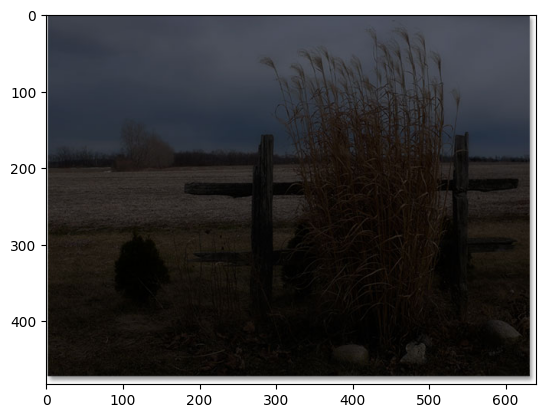

In [51]:
plt.imshow(img);

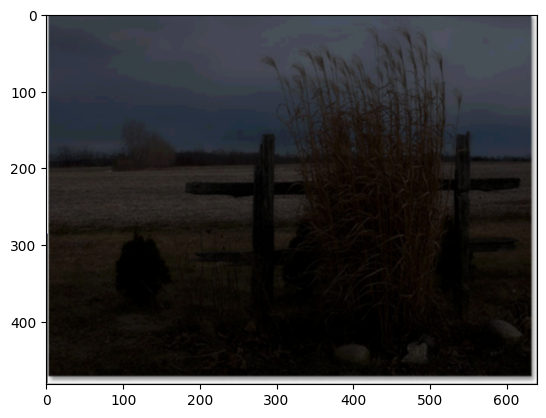

In [52]:
plt.imshow(df_total_gaussian);

Make gaussian copy so we can include the image.shape 
in above

In [53]:
df_total_gaussian.shape

(482, 640, 3)

In [54]:
df_rc = pd.read_csv("image_less_brightness_txt/image_brightness_R.txt")
df_rc = df_rc.to_numpy()[:, :-1]
df_rc = np.abs(df_rc)
df_rc = np.uint8(df_rc)
df_rc

array([[ 40,  15,  56, ...,  46, 230, 190],
       [ 40,  36, 108, ..., 118,  46,   7],
       [ 40,  34, 111, ..., 108,  45,   6],
       ...,
       [212, 249, 186, ..., 104,  40,   3],
       [215, 252, 188, ..., 113,  43,   6],
       [125, 182, 117, ...,  43, 247,   7]], dtype=uint8)

In [55]:
df_gc = pd.read_csv("image_less_brightness_txt/image_brightness_G.txt")
df_gc = df_gc.to_numpy()[:, :-1]
df_gc = np.abs(df_gc)
df_gc = np.uint8(df_gc)
df_gc

array([[ 40,  19,  64, ...,  46, 230, 190],
       [ 40,  37, 117, ..., 118,  46,   7],
       [ 40,  36, 116, ..., 108,  45,   6],
       ...,
       [212, 249, 186, ..., 104,  40,   3],
       [215, 252, 188, ..., 113,  43,   6],
       [125, 182, 117, ...,  43, 247,   7]], dtype=uint8)

In [57]:
df_bc = pd.read_csv("image_less_brightness_txt/image_brightness_B.txt")
df_bc = df_bc.to_numpy()[:, :-1]
df_bc = np.abs(df_bc)
df_bc = np.uint8(df_bc)
df_bc

array([[ 40,  21,  71, ...,  46, 230, 190],
       [ 40,  38, 124, ..., 118,  46,   7],
       [ 40,  38, 123, ..., 108,  45,   6],
       ...,
       [212, 249, 186, ..., 104,  40,   3],
       [215, 252, 188, ..., 113,  43,   6],
       [125, 182, 117, ...,  43, 247,   7]], dtype=uint8)

In [58]:
df_total = np.stack([df_rc, df_gc, df_bc], axis=2)

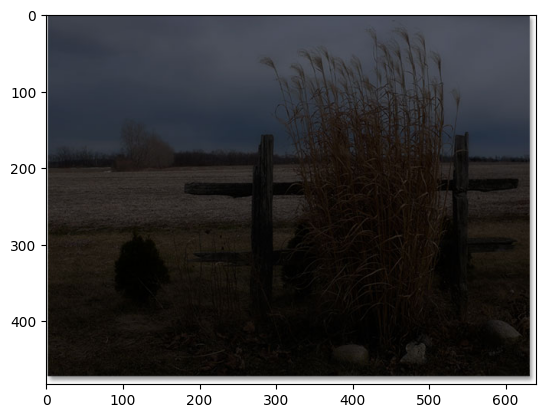

In [61]:
plt.imshow(img);

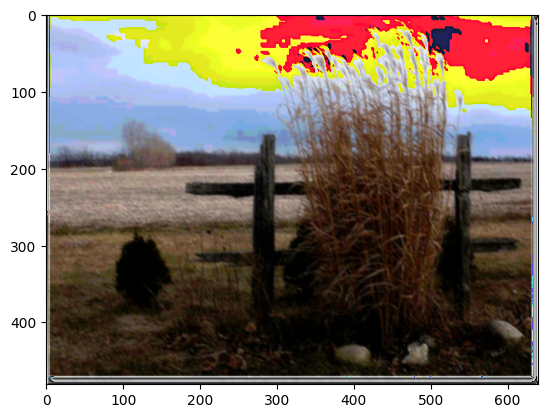

In [60]:
plt.imshow(df_total);

Well good, but not so perfect. Maybe because the image. Maybe your image will perfect

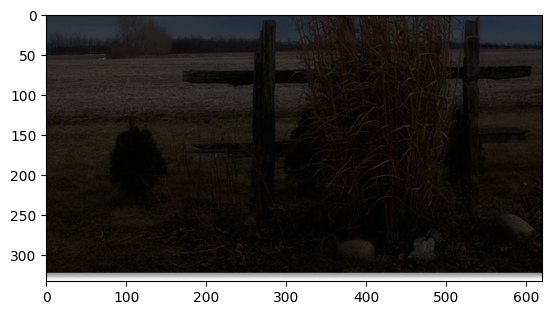

In [65]:
plt.imshow(img[150:, 10:-10]);

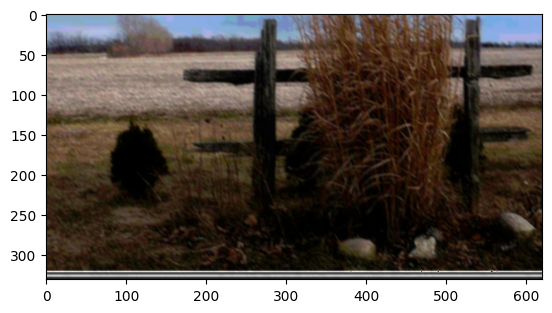

In [64]:
plt.imshow(df_total[150:, 10:-10]);

Now good, haha.
Btw, the gaussian filter is used to reduce (small) the cartoonize effect.